In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms

import warnings
warnings.filterwarnings('ignore')

In [2]:
 df_airlines = pd.read_csv('/content/airline_passengers.csv')
 df_airlines.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [3]:
df_airlines.isnull().sum()

Month                      0
Thousands of Passengers    1
dtype: int64

In [4]:
df_airlines.tail()

,Month,Thousands of Passengers
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


In [5]:
df_airlines.set_index('Month', inplace=True)

In [6]:
df_airlines.dropna(axis=0,inplace=True )

In [7]:
df_airlines.isna().any()

Thousands of Passengers    False
dtype: bool

In [8]:
df_airlines.head()

,Thousands of Passengers
Month,
1949-01,112.0
1949-02,118.0
1949-03,132.0
1949-04,129.0
1949-05,121.0


<Axes: xlabel='Month'>

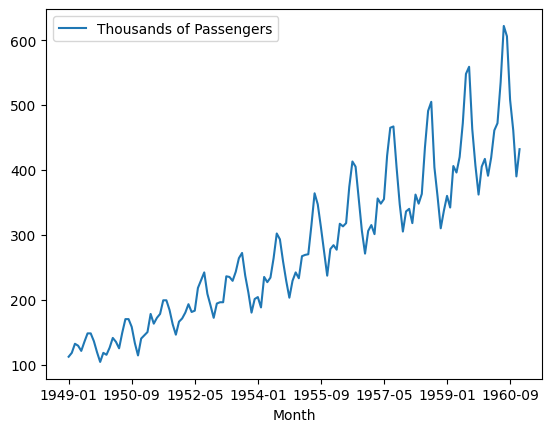

In [9]:
df_airlines.plot()

* It is a seasonal data. But not a stationary data.
* So we will use Dickey Fuller Test

In [13]:
from statsmodels.tsa.stattools import adfuller

In [17]:
def adf_test(series):
    results = adfuller(series)
    print('ADF Statistics: {}'.format(results[0]))
    print('p value: {}'.format(results[1]))

    if results[1] <= 0.5:
        print('Strong evidence against the null hhypothesis, reject the null hypothesis and data has no unit root and is stationary.')
    else:
        print('Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary "')

In [18]:
adf_test(df_airlines['Thousands of Passengers'])

ADF Statistics: 0.8153688792060498
p value: 0.991880243437641
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary "


In [19]:
## Use technique Differencing
df_airlines['Passenger First Difference'] = df_airlines['Thousands of Passengers'] - df_airlines['Thousands of Passengers'].shift(1)

In [20]:
df_airlines.head()

,Thousands of Passengers,Passenger First Difference
Month,,
1949-01,112.0,NaN
1949-02,118.0,6.0
1949-03,132.0,14.0
1949-04,129.0,-3.0
1949-05,121.0,-8.0


In [23]:
adf_test(df_airlines['Passenger First Difference'].dropna())

ADF Statistics: -2.8292668241700047
p value: 0.05421329028382478
Strong evidence against the null hhypothesis, reject the null hypothesis and data has no unit root and is stationary.


In [24]:
## Use technique differencing
df_airlines['Passenger Second Difference'] = df_airlines['Passenger First Difference'] - df_airlines['Passenger First Difference'].shift(1)

In [25]:
adf_test(df_airlines['Passenger Second Difference'].dropna())

ADF Statistics: -16.384231542468513
p value: 2.7328918500142026e-29
Strong evidence against the null hhypothesis, reject the null hypothesis and data has no unit root and is stationary.


In [26]:
## 12 Months (Seasonal Data)
# Use technique differencing
df_airlines['Passenger 12 Difference'] = df_airlines['Thousands of Passengers'] - df_airlines['Thousands of Passengers'].shift(12)

In [27]:
adf_test(df_airlines['Passenger 12 Difference'].dropna())

ADF Statistics: -3.383020726492481
p value: 0.011551493085514952
Strong evidence against the null hhypothesis, reject the null hypothesis and data has no unit root and is stationary.


In [28]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

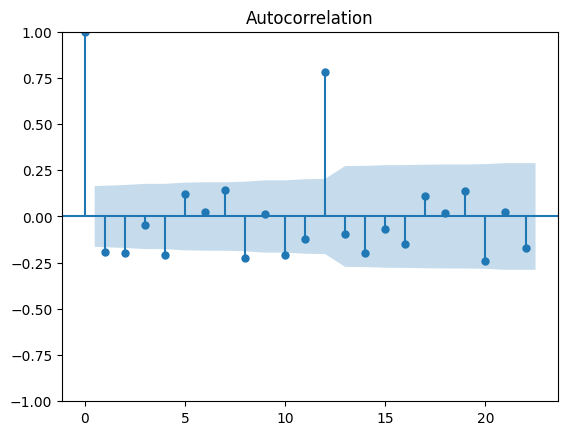

In [29]:
acf = plot_acf(df_airlines['Passenger Second Difference'].dropna())

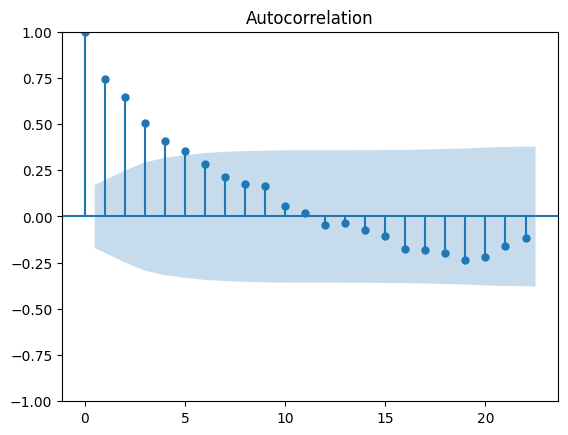

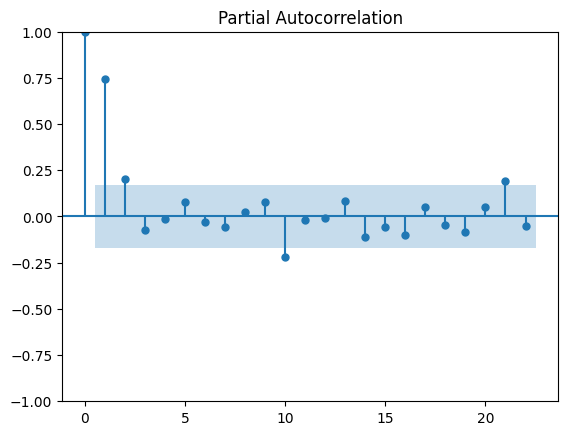

In [34]:
acf12 = plot_acf(df_airlines["Passenger 12 Difference"].dropna())
pacf12 = plot_pacf(df_airlines["Passenger 12 Difference"].dropna())

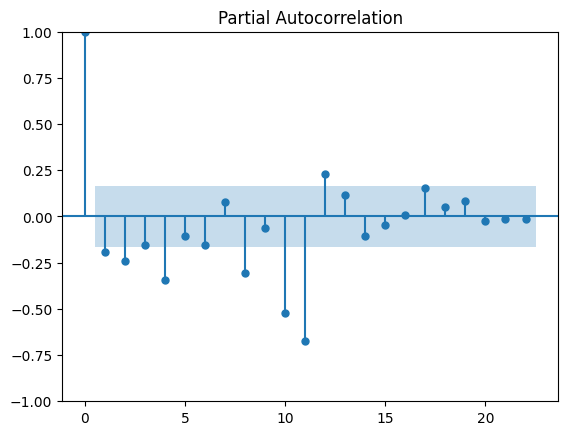

In [30]:
pacf = plot_pacf(df_airlines['Passenger Second Difference'].dropna())

In [35]:
# Split train and test data
df_airlines

,Thousands of Passengers,Passenger First Difference,Passenger Second Difference,Passenger 12 Difference
Month,,,,
1949-01,112.0,NaN,NaN,NaN
1949-02,118.0,6.0,NaN,NaN
1949-03,132.0,14.0,8.0,NaN
1949-04,129.0,-3.0,-17.0,NaN
1949-05,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1960-08,606.0,-16.0,-103.0,47.0
1960-09,508.0,-98.0,-82.0,45.0
1960-10,461.0,-47.0,51.0,54.0


In [44]:
from datetime import datetime, timedelta

train_dataset_end = datetime(1955,12,1)
test_dataset_end = datetime(1960,12,1)

# Convert datetime strings to datetime objects
train_dataset_end = pd.to_datetime(train_dataset_end)
test_dataset_end = pd.to_datetime(test_dataset_end)


In [46]:
# DataFrame has a datetime index
df_airlines.index = pd.to_datetime(df_airlines.index)

In [47]:
# Slicing the DataFrame based on datetime
train_data = df_airlines[df_airlines.index <= train_dataset_end]
test_data = df_airlines[(df_airlines.index > train_dataset_end) & (df_airlines.index <= test_dataset_end)]

In [48]:
# Prediction
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

In [49]:
test_data

,Thousands of Passengers,Passenger First Difference,Passenger Second Difference,Passenger 12 Difference
Month,,,,
1956-01-01,284.0,6.0,-35.0,42.0
1956-02-01,277.0,-7.0,-13.0,44.0
1956-03-01,317.0,40.0,47.0,50.0
1956-04-01,313.0,-4.0,-44.0,44.0
1956-05-01,318.0,5.0,9.0,48.0
1956-06-01,374.0,56.0,51.0,59.0
1956-07-01,413.0,39.0,-17.0,49.0
1956-08-01,405.0,-8.0,-47.0,58.0
1956-09-01,355.0,-50.0,-42.0,43.0


In [51]:
train_data

,Thousands of Passengers,Passenger First Difference,Passenger Second Difference,Passenger 12 Difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1955-08-01,347.0,-17.0,-66.0,54.0
1955-09-01,312.0,-35.0,-18.0,53.0
1955-10-01,274.0,-38.0,-3.0,45.0


In [56]:
# Create a ARIMA model
from statsmodels.tsa.arima.model import ARIMA

In [57]:
order=(10, 2, 12)
model_ARIMA = ARIMA(train_data['Thousands of Passengers'], order=order) #p,d,q

In [58]:
model_arima_fit = model_ARIMA.fit()

In [59]:
model_arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                  
===================================================================================
Dep. Variable:     Thousands of Passengers   No. Observations:                   84
Model:                    ARIMA(10, 2, 12)   Log Likelihood                -307.735
Date:                     Wed, 16 Aug 2023   AIC                            661.469
Time:                             06:33:20   BIC                            716.824
Sample:                         01-01-1949   HQIC                           683.693
                              - 12-01-1955                                         
Covariance Type:                       opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0468      0.115      0.408      0.683      -0.178       0.271
ar.L2         -1.0429      0.084    -12.479      0.000      -1.207      -0.879
ar.L3          0.0886      0.139      0.638      0.523      -0.183       0.361
ar.L4         -1.0259      0.131     -7.825      0.000      -1.283      -0.769
ar.L5          0.0658      0.155      0.423      0.672      -0.239       0.370
ar.L6         -0.9861      0.143     -6.882      0.000      -1.267      -0.705
ar.L7          0.0175      0.142      0.123      0.902      -0.261       0.296
ar.L8         -0.9822      0.122     -8.030      0.000      -1.222      -0.742
ar.L9         -0.0069      0.095     -0.073      0.942      -0.193       0.179
ar.L10        -0.9389      0.085    -11.096      0.000      -1.105      -0.773
ma.L1         -1.2855      0.254     -5.057      0.000      -1.784      -0.787
ma.L2          1.2393      0.359      3.455      0.001       0.536       1.942
ma.L3         -1.4415      0.437     -3.302      0.001      -2.297      -0.586
ma.L4          1.3761      0.507      2.713      0.007       0.382       2.370
ma.L5         -1.2166      0.575     -2.116      0.034      -2.344      -0.090
ma.L6          1.0831      0.660      1.640      0.101      -0.211       2.378
ma.L7         -1.0701      0.715     -1.497      0.134      -2.471       0.331
ma.L8          0.8861      0.819      1.082      0.279      -0.719       2.491
ma.L9         -0.7852      0.737     -1.066      0.287      -2.229       0.659
ma.L10         0.5230      0.601      0.870      0.384      -0.656       1.702
ma.L11        -0.4130      0.455     -0.908      0.364      -1.305       0.479
ma.L12         0.1336      0.273      0.489      0.625      -0.402       0.669
sigma2        77.2663     16.217      4.764      0.000      45.481     109.052
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 4.74
Prob(Q):                              0.99   Prob(JB):                         0.09
Heteroskedasticity (H):               2.12   Skew:                             0.59
Prob(H) (two-sided):                  0.06   Kurtosis:                         2.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [60]:
# Prediction
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [61]:
pred = model_arima_fit.predict(start=pred_start_date, end=pred_end_date)

residuals = test_data['Thousands of Passengers'] - pred

In [62]:
residuals

Month
1956-01-01      0.755907
1956-02-01      7.483366
1956-03-01     21.814335
1956-04-01     14.409535
1956-05-01     18.898844
1956-06-01     28.643513
1956-07-01     24.517730
1956-08-01     33.110557
1956-09-01     14.908693
1956-10-01      3.101660
1956-11-01     -0.800719
1956-12-01      3.374272
1957-01-01      3.923324
1957-02-01      7.196091
1957-03-01     39.036242
1957-04-01     23.481795
1957-05-01     28.894793
1957-06-01     49.296191
1957-07-01     50.450342
1957-08-01     70.449114
1957-09-01     38.702232
1957-10-01     14.777529
1957-11-01      2.498343
1957-12-01      6.546215
1958-01-01      1.460923
1958-02-01     -0.391976
1958-03-01     23.046583
1958-04-01     -2.520303
1958-05-01      9.765037
1958-06-01     35.422927
1958-07-01     50.518704
1958-08-01     83.707445
1958-09-01     13.326792
1958-10-01     -2.575267
1958-11-01    -23.157912
1958-12-01    -19.286357
1959-01-01     -5.685713
1959-02-01     -1.251762
1959-03-01     44.813430
1959-04-01     19.4

<Axes: ylabel='Density'>

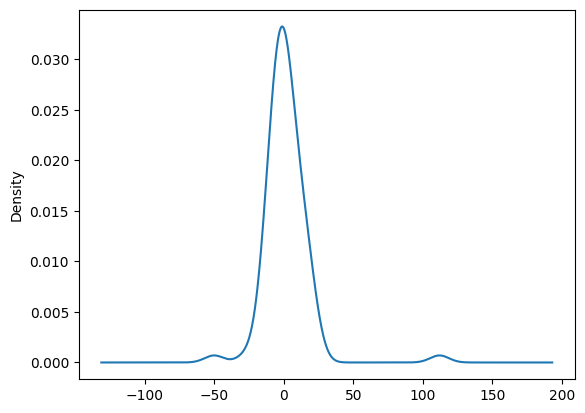

In [64]:
model_arima_fit.resid.plot(kind='kde')

In [65]:
test_data['Predicted_Arima'] = pred

<Axes: xlabel='Month'>

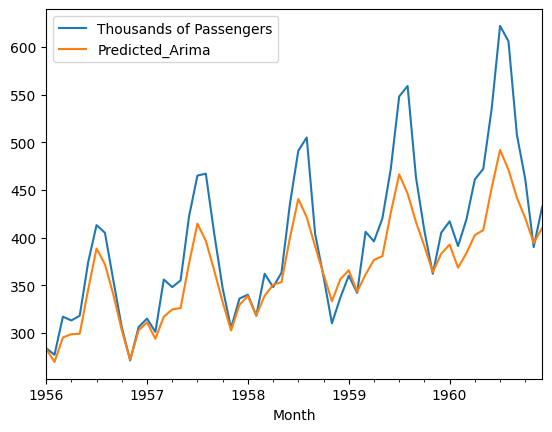

In [66]:
test_data[['Thousands of Passengers','Predicted_Arima']].plot()

In [68]:
# Make predictions
forecast = model_arima_fit.forecast(steps=len(test_data))

In [69]:
forecast

1956-01-01    283.244093
1956-02-01    269.516634
1956-03-01    295.185665
1956-04-01    298.590465
1956-05-01    299.101156
1956-06-01    345.356487
1956-07-01    388.482270
1956-08-01    371.889443
1956-09-01    340.091307
1956-10-01    302.898340
1956-11-01    271.800719
1956-12-01    302.625728
1957-01-01    311.076676
1957-02-01    293.803909
1957-03-01    316.963758
1957-04-01    324.518205
1957-05-01    326.105207
1957-06-01    372.703809
1957-07-01    414.549658
1957-08-01    396.550886
1957-09-01    365.297768
1957-10-01    332.222471
1957-11-01    302.501657
1957-12-01    329.453785
1958-01-01    338.539077
1958-02-01    318.391976
1958-03-01    338.953417
1958-04-01    350.520303
1958-05-01    353.234963
1958-06-01    399.577073
1958-07-01    440.481296
1958-08-01    421.292555
1958-09-01    390.673208
1958-10-01    361.575267
1958-11-01    333.157912
1958-12-01    356.286357
1959-01-01    365.685713
1959-02-01    343.251762
1959-03-01    361.186570
1959-04-01    376.556780
